In [1]:
from pathlib import Path

import cv2
import numpy as np

from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
def read_directory(path):
    k1 = 160. / 512
    k2 = 470. / 512
    images = []

    for path_image in path.iterdir():
        image = cv2.imread(str(path_image))  # , cv2.IMREAD_GRAYSCALE
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        images.append(image)
#         image = image[int(k1*image.shape[0]):int(k2*image.shape[0])]
#         image0 = image[:, :image.shape[1]//2]
#         image1 = image[:, image.shape[1]//2:][:, ::-1]
#         image0 = cv2.resize(image0, (224, 224))
#         image1 = cv2.resize(image1, (224, 224))
#         images += [image0, image1]

    return np.array(images).astype(np.float32) / 255.0


path_data = Path(r'C:\Users\Tim\Documents\GitHub\Study\X-ray\xray\data\xray_dataset\Xray_samples_real_and_fake_age18-24')
path_real_female = path_data / r'real\f'
path_fake_female = path_data / r'fake\f'
path_real_male = path_data / r'real\m'
path_fake_male = path_data / r'fake\m'

images_real_female.shape: (234, 224, 224, 3)
images_fake_female.shape: (290, 224, 224, 3)
images_real_male.shape: (172, 224, 224, 3)
images_fake_male.shape: (249, 224, 224, 3)
images_real.shape: (406, 224, 224, 3)


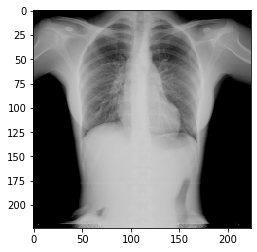

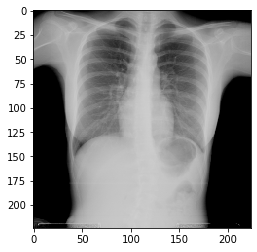

In [5]:
images_real_female = read_directory(path_real_female)
images_fake_female = read_directory(path_fake_female)
images_real_male = read_directory(path_real_male)
images_fake_male = read_directory(path_fake_male)

images_real = np.concatenate((images_real_female, images_real_male))

print('images_real_female.shape:', images_real_female.shape)
print('images_fake_female.shape:', images_fake_female.shape)
print('images_real_male.shape:', images_real_male.shape)
print('images_fake_male.shape:', images_fake_male.shape)
print('images_real.shape:', images_real.shape)

i = 0
plt.imshow(images_real_female[2*i]); plt.show()
plt.imshow(images_real_female[2*i+1]); plt.show()

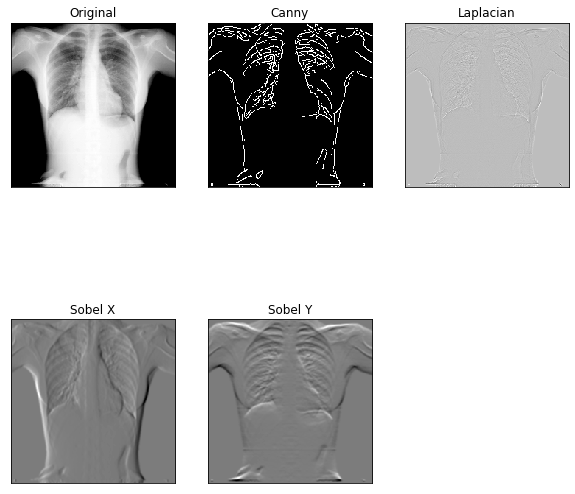

In [6]:
def show_edges():
    image = images_real_female[0]
    image = (image * 255).astype(np.uint8)
    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    canny = cv2.Canny(image, 60, 120)

    plt.figure(figsize=(10,10))

    plt.subplot(2,3,1)
    plt.imshow(image, cmap='gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])

    plt.subplot(2,3,2)
    plt.imshow(canny, cmap='gray')
    plt.title('Canny'), plt.xticks([]), plt.yticks([])

    plt.subplot(2,3,3)
    plt.imshow(laplacian, cmap='gray')
    plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

    plt.subplot(2,3,4)
    plt.imshow(sobelx, cmap='gray')
    plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

    plt.subplot(2,3,5)
    plt.imshow(sobely, cmap='gray')
    plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

    plt.show()
    
    
show_edges()

shape: (234, 50176) mean: -8.83595e-09 std: 1.0000004
pca.n_components_: 228
(1, 50176)


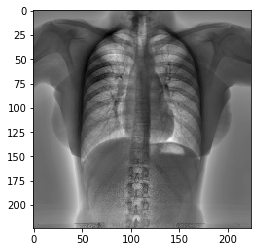

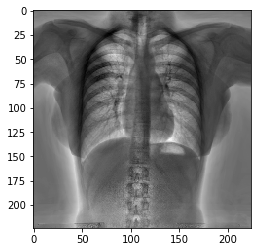

0.11867807 0.0 1.0


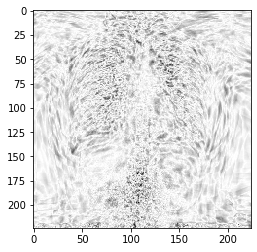

Wall time: 6.48 s


In [41]:
%%time

def show_PCA():
    data = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in images_real_female])
    data = data.reshape(data.shape[0], -1)
    
    scaler = StandardScaler()
    data = scaler.fit_transform(data)
    print('shape:', data.shape, 'mean:', data.mean(), 'std:', data.std())

    pca = PCA(n_components=0.999, svd_solver='full')  # , svd_solver='randomized'
    pca.fit(data)
    print('pca.n_components_:', pca.n_components_)

#     fig = plt.figure(figsize=(10,10))
#     for i in range(12):
#         ax = fig.add_subplot(3, 4, i + 1, xticks=[], yticks=[])
#         ax.imshow(pca.components_[i].reshape((224, 224)), cmap='binary')

    image = data[[77]]
#     image = scaler.transform(cv2.cvtColor(images_fake_female[8], cv2.COLOR_RGB2GRAY).reshape(1, -1))
    temp = pca.transform(image)
    temp = pca.inverse_transform(temp)
    print(temp.shape)
    plt.imshow(image[0].reshape((224, 224)), cmap='binary')
    plt.show()
    plt.imshow(temp[0].reshape((224, 224)), cmap='binary')
    plt.show()
    diff = np.abs(image[0] - temp[0])
    diff = diff - diff.min()
    diff = diff / diff.max()
    print(diff.mean(), diff.min(), diff.max())
    plt.imshow(diff.reshape((224, 224)), cmap='binary')
    plt.show()
        
        
show_PCA()

In [6]:
# mode = 'test'
# x_false_positive = np.load('xray/data/x_{}_false_positive.npy'.format(mode))
# x_false_negative = np.load('xray/data/x_{}_false_negative.npy'.format(mode))

# print('x_false_positive.shape:', x_false_positive.shape)
# print('x_false_negative.shape:', x_false_negative.shape)

# print('x_false_positive')
# for x in x_false_positive:
#     plt.imshow(x);
#     plt.show()
    
# print('x_false_negative')
# for x in x_false_negative:
#     plt.imshow(x);
#     plt.show()